In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/accidents_clean.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463143 entries, 0 to 463142
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463143 non-null  object 
 1   dia_semana              463143 non-null  object 
 2   horario                 463143 non-null  object 
 3   uf                      463143 non-null  object 
 4   br                      462153 non-null  float64
 5   km                      462153 non-null  object 
 6   municipio               463143 non-null  object 
 7   causa_acidente          463143 non-null  object 
 8   tipo_acidente           463103 non-null  object 
 9   classificacao_acidente  463143 non-null  object 
 10  fase_dia                463143 non-null  object 
 11  sentido_via             463143 non-null  object 
 12  condicao_metereologica  463143 non-null  object 
 13  tipo_pista              463143 non-null  object 
 14  tracado_via         

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",Vacaria,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,domingo,01:00:00,PR,376.0,636,Tijucas Do Sul,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,domingo,04:40:00,BA,101.0,65,Entre Rios,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",Castanhal,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,domingo,09:00:00,GO,20.0,"220,5",Posse,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


In [3]:
print('Período:', df['data_inversa'].min(), '→', df['data_inversa'].max())

Período: 2017-01-01 → 2023-08-31


In [4]:
print('Estados únicos:', df['uf'].nunique())

Estados únicos: 27


In [5]:
print('Municípios únicos:', df['municipio'].nunique())

Municípios únicos: 2083


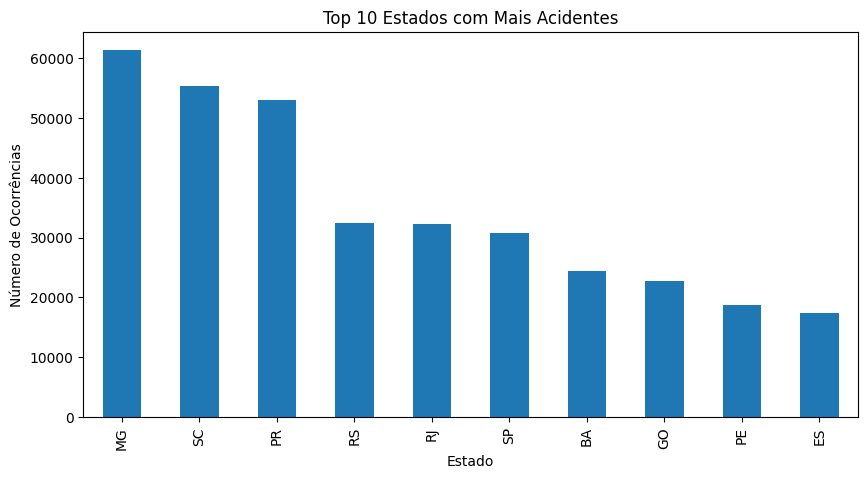

In [6]:
plt.figure(figsize=(10,5))
df['uf'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Estados com Mais Acidentes')
plt.xlabel('Estado')
plt.ylabel('Número de Ocorrências')
plt.show()

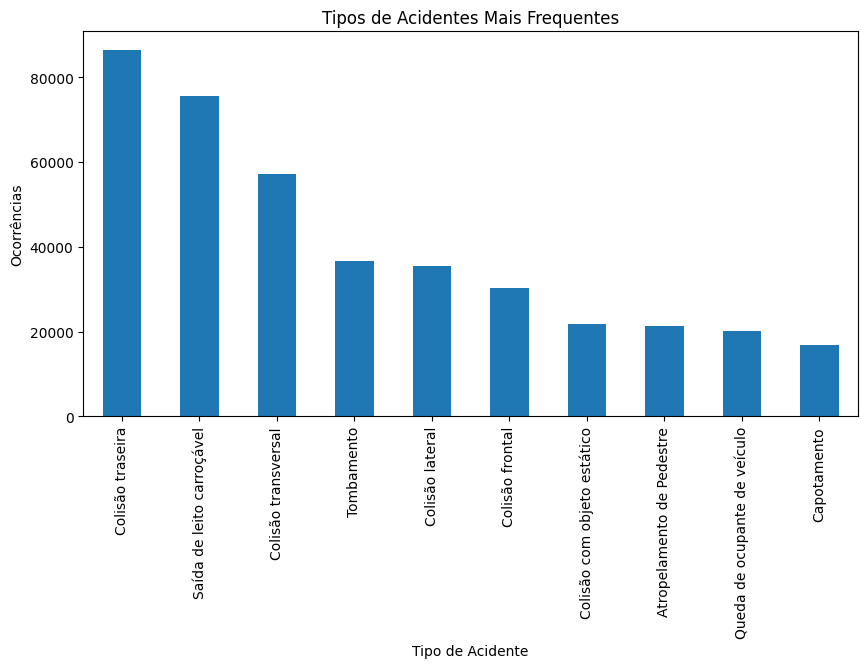

In [7]:
plt.figure(figsize=(10,5))
df['tipo_acidente'].value_counts().head(10).plot(kind='bar')
plt.title('Tipos de Acidentes Mais Frequentes')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Ocorrências')
plt.show()

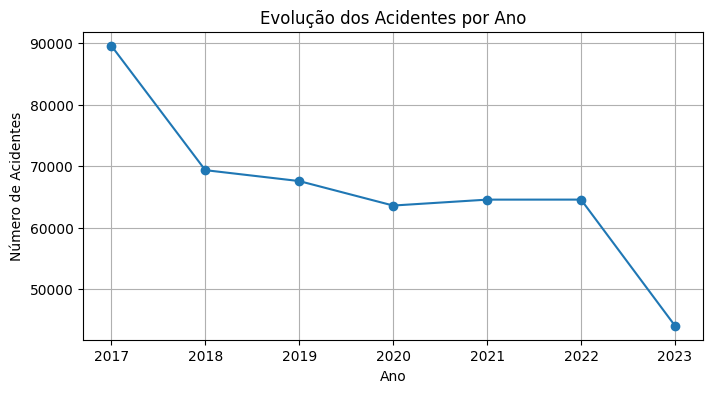

In [8]:
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')
df['ano'] = df['data_inversa'].dt.year

df.groupby('ano').size().plot(kind='line', marker='o', figsize=(8,4))
plt.title('Evolução dos Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.grid(True)
plt.show()

In [9]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[-14.2, -51.9], zoom_start=4)
amostra = df[['latitude', 'longitude']].dropna().sample(5000, random_state=42)
HeatMap(data=amostra).add_to(mapa)
mapa.save('../data/processed/mapa_calor.html')